# Aviation ANAC (Agência Nacional de Aviação Civil) - Data Exploratory Analysis

Last year the aviation sector had a lot of problems caused by the Corovirus pandemic, impacting the profit of the aviation companies, numbers of flights and value in the stock market. To see this impact in the Brasil's aviation market I bring a data exploratory analysis from ANAC flights dataset.

(ref: https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados).

The questions that I want to answer are:

1 - How was the impact in the numbers of flights because of pandemic ?

2 - Is the aviation sector reached the levels before the pandemic already?

3 - How was most travel route before and after the pandemic ?

4 - How was the impact in the number os passengers ?






#### Importing the libraries

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import requests                        # Biblioteca para solicitações HTTP
import urllib.request                  # Módulo para ler URLs
from zipfile import ZipFile
import warnings

warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

#### Getting dataset at ANAC's site

In this step we are going to download the zip archives from ANAC's site (https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/). Extract the txt from the zip for each month and stack then up to create the final dataset that we are going to work.

We are going to extract just the last 2 years (2019 and 2020) to do this analysis, if you want more data be free to change the range of the year:

Intead of <code> range(2019,2021) </code> you can change to

<code> range(year_I_want_to_begin , year_I_want_to_finish + 1) </code> . 

But you have to be carefull when trying to get a lot of years to the final dataset, I experience some problems using my computer so stack up all the data when I tried to get five or plus years.

In [8]:
months = ['01','02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
final_df = pd.DataFrame()

print('Downloading data and extracting from zip ... ')
for year in range(2019,2021):
    for month in months:
        
        print('https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica' + str(year) + '-' +  month + '.zip')
        urllib.request.urlretrieve('https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica' + str(year) + '-' +  month + '.zip', 'basica' + str(year) + '-' +  month + '.zip')
        
        with ZipFile('basica' + str(year) + '-' +  month + '.zip', 'r') as zipObj:
           # Extract all the contents of zip file in current directory
            zipObj.extractall()
            
        final_df = final_df.append(pd.read_csv('basica' + str(year) + '-' +  month + '.txt', sep = ";",  encoding='latin'))

print('Data downloaded')

https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2019-01.zip
https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2019-02.zip
https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2019-03.zip
https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2019-04.zip
https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2019-05.zip
https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2019-06.zip
https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2019-07.zip
https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2019-08.zip
https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2019-09.zip
https://www.anac.gov.br/assuntos/seto

In [9]:
final_df.head(5)

,id_basica,id_empresa,sg_empresa_icao,sg_empresa_iata,nm_empresa,nm_pais,ds_tipo_empresa,nr_voo,nr_singular,id_di,cd_di,ds_di,ds_grupo_di,dt_referencia,nr_ano_referencia,nr_semestre_referencia,nm_semestre_referencia,nr_trimestre_referencia,nm_trimestre_referencia,nr_mes_referencia,nm_mes_referencia,nr_semana_referencia,nm_dia_semana_referencia,nr_dia_referencia,nr_ano_mes_referencia,id_tipo_linha,cd_tipo_linha,ds_tipo_linha,ds_natureza_tipo_linha,ds_servico_tipo_linha,ds_natureza_etapa,hr_partida_real,dt_partida_real,nr_ano_partida_real,nr_semestre_partida_real,nm_semestre_partida_real,nr_trimestre_partida_real,nm_trimestre_partida_real,nr_mes_partida_real,nm_mes_partida_real,nr_semana_partida_real,nm_dia_semana_partida_real,nr_dia_partida_real,nr_ano_mes_partida_real,id_aerodromo_origem,sg_icao_origem,sg_iata_origem,nm_aerodromo_origem,nm_municipio_origem,sg_uf_origem,nm_regiao_origem,nm_pais_origem,nm_continente_origem,nr_etapa,hr_chegada_real,dt_chegada_real,nr_ano_chegada_real,nr_semestre_chegada_real,nm_semestre_chegada_real,nr_trimestre_chegada_real,nm_trimestre_chegada_real,nr_mes_chegada_real,nm_mes_chegada_real,nr_semana_chegada_real,nm_dia_semana_chegada_real,nr_dia_chegada_real,nr_ano_mes_chegada_real,id_equipamento,sg_equipamento_icao,ds_modelo,ds_matricula,id_aerodromo_destino,sg_icao_destino,sg_iata_destino,nm_aerodromo_destino,nm_municipio_destino,sg_uf_destino,nm_regiao_destino,nm_pais_destino,nm_continente_destino,nr_escala_destino,lt_combustivel,nr_assentos_ofertados,kg_payload,km_distancia,nr_passag_pagos,nr_passag_gratis,kg_bagagem_livre,kg_bagagem_excesso,kg_carga_paga,kg_carga_gratis,kg_correio,nr_decolagem,nr_horas_voadas,kg_peso,nr_velocidade_media,nr_pax_gratis_km,nr_carga_paga_km,nr_carga_gratis_km,nr_correio_km,nr_bagagem_paga_km,nr_bagagem_gratis_km,nr_ask,nr_rpk,nr_atk,nr_rtk,id_arquivo,nm_arquivo,nr_linha,dt_sistema
0,15348896,1000357,SLM,PY,SURINAM AIRWAYS LTD,SURINAME,ESTRANGEIRA REGULAR,9916,999,2,0,REGULAR PREVISTO EM HOTRAN,REGULAR,2019-01-04,2019,1,1º SEMESTRE,1,1º TRIMESTRE,1,JANEIRO,1,SEXTA-FEIRA,4,201901,0,X,NÃO IDENTIFICADA,NÃO IDENTIFICADA,NÃO IDENTIFICADO,INTERNACIONAL,04:52:00,2019-01-04,2019.0,1.0,1º SEMESTRE,1.0,1º TRIMESTRE,1.0,JANEIRO,1.0,SEXTA-FEIRA,4.0,201901.0,96,SBBE,BEL,INTERNACIONAL DE BELÉM/VAL DE CANS/JÚLIO CEZAR...,BELÉM,PA,NORTE,BRASIL,AMÉRICA DO SUL,1,06:55:00,2019-01-04,2019.0,1.0,1º SEMESTRE,1.0,1º TRIMESTRE,1.0,JANEIRO,1.0,SEXTA-FEIRA,4.0,201901.0,100,B737,BOEING 737-700 (WINGLETS) PAX,NaN,814,SMJP,PBM,JOHAN ADOLF PENGEL INTERNATIONAL AIRPORT (ZAND...,ZANDERIJ,NaN,NaN,SURINAME,AMÉRICA DO SUL,NaN,NaN,128,12705,1065.0,76.0,0.0,NaN,NaN,0.0,0.0,0.0,1,"2,05",5700.0,"519,275",0.0,0.0,0.0,0.0,NaN,NaN,136320.0,80940.0,13530.0,7284.0,14082,SLMJAN19.txt,12.0,2019-08-28 02:17:16
1,15348895,1000357,SLM,PY,SURINAM AIRWAYS LTD,SURINAME,ESTRANGEIRA REGULAR,9915,999,2,0,REGULAR PREVISTO EM HOTRAN,REGULAR,2019-01-04,2019,1,1º SEMESTRE,1,1º TRIMESTRE,1,JANEIRO,1,SEXTA-FEIRA,4,201901,0,X,NÃO IDENTIFICADA,NÃO IDENTIFICADA,NÃO IDENTIFICADO,INTERNACIONAL,02:03:00,2019-01-04,2019.0,1.0,1º SEMESTRE,1.0,1º TRIMESTRE,1.0,JANEIRO,1.0,SEXTA-FEIRA,4.0,201901.0,814,SMJP,PBM,JOHAN ADOLF PENGEL INTERNATIONAL AIRPORT (ZAND...,ZANDERIJ,NaN,NaN,SURINAME,AMÉRICA DO SUL,1,03:37:00,2019-01-04,2019.0,1.0,1º SEMESTRE,1.0,1º TRIMESTRE,1.0,JANEIRO,1.0,SEXTA-FEIRA,4.0,201901.0,100,B737,BOEING 737-700 (WINGLETS) PAX,NaN,96,SBBE,BEL,INTERNACIONAL DE BELÉM/VAL DE CANS/JÚLIO CEZAR...,BELÉM,PA,NORTE,BRASIL,AMÉRICA DO SUL,NaN,NaN,128,12705,1065.0,42.0,0.0,NaN,NaN,0.0,0.0,0.0,1,"1,57",3150.0,"678,034",0.0,0.0,0.0,0.0,NaN,NaN,136320.0,44730.0,13530.0,4025.0,14082,SLMJAN19.txt,7.0,2019-08-28 02:17:16
2,15348905,1000357,SLM,PY,SURINAM AIRWAYS LTD,SURINAME,ESTRANGEIRA REGULAR,9913,999,2,0,REGULAR PREVISTO EM HOTRAN,REGULAR,2019-01-22,2019,1,1º SEMESTRE,1,1º TRIMESTRE,1,JANEIRO,4,TERÇA-FEIRA,22,201901,0,X,NÃO IDENTIFICADA,NÃO IDENTIFICADA,NÃO IDENTIFICADO,INTERNACIONAL,01:43:00,2019-01-22,2019.0,1.0,1º SEMESTRE,1.0,1º TR

### Glossary (in portuguese)
- **id_basica**: Numero de identificação do voo
- **id_empresa** : Numero de Identificação da Empresa responsável pelo voo
- **nm_empresa**: Nome da Empresa
- **nm_pais**: Nome do País
- **nr_ano_referencia**: Ano do Voo
- **nr_semestre_referencia**: Semestre do Voo
- **nr_trimestre_referencia**: Trimestre do Voo
- **nr_mes_referencia**: Mês do Voo
- **nr_semana_referencia**: Semana do Voo
- **nr_dia_semana_referencia**: Dia da Semana do Voo
- **nr_dia_referencia**: Dia do Voo
- **ds_natureza_etapa**: Tipo de Voo (Se voo é domestico ou internacional).
- **hr_partida_real**: Horário da partida.
-	**dt_partida_real**: Data da partida.
- **sg_icao_origem**: Sigla do aeroporto de origem
- **sg_iata_origem**: Código Aeroporto
- **nm_aerodromo_origem**: Nome do Aeroporto de origem
- **nm_municipio_origem**: Nome da cidade de origem
- **nm_uf_origem**: Nome do estado de origem
- **nm_regiao_origem**: Nome da região brasileira de origem (se houver)
- **nm_pais_origem**: Nome do país de origem
- **hr_chegada_real**: Horário do pouso
- **dt_chegada_real**: Data do pouso
- **ds_modelo**: Modelo da aeronave.
- **sg_icao_destino**: Sigla do aeroporto de destino
- **sg_iata_destino**: Código Aeroporto
- **nm_aerodromo_destino**: Nome do Aeroporto de destino
- **nm_municipio_destino**: Nome da cidade de destino
- **nm_uf_destino**: Nome do estado de destino
- **nm_regiao_destino**: Nome da região brasileira de destino (se houver)
- **nm_pais_destino**: Nome do país de destino
- **nr_assentos_ofertados**: Quantidade de assentos ofertados na viagem
- **km_distancia**: Distância percorrida pelo voo em kilometros
- **kg_payload**: Carga paga máxima transportada pela aeronave em kilos
- **nr_passag_pagos**: Quantidade de passagens pagas no voo
- **nr_passag_gratis**: Quantidade de passagens não pagas (grátis) no voo
- **kg_carga_paga**: Carga paga transportada pela aeronave em kilos no voo
- **nr_horas_voadas**: Quantidades de horas voadas.
- **nr_velocidade_media**: Velocidade média da aeronave no voo

In [10]:
#Agrupando as variáveis importantes
final_df['qtd_voos'] = 1

columns = ['id_empresa', 'nm_empresa', 'nm_pais', 'nr_ano_referencia', 'nr_semestre_referencia',
           'nr_trimestre_referencia', 'nr_mes_referencia', 'nm_dia_semana_referencia', 
           'nr_dia_referencia','ds_natureza_etapa', 'nm_aerodromo_origem', 'nm_municipio_origem',
           'sg_uf_origem','nm_regiao_origem', 'nm_pais_origem', 'ds_modelo', 'nm_aerodromo_destino',
           'nm_municipio_destino','sg_uf_destino', 'nm_regiao_destino', 'nm_pais_destino', 'nr_ano_mes_referencia'   ]

columns_values = ['qtd_voos', 'kg_payload', 'km_distancia', 'nr_passag_pagos', 'nr_passag_gratis', 
                  'kg_bagagem_livre', 'kg_bagagem_excesso', 'kg_carga_paga', 'kg_correio', 'kg_peso',
                  'nr_pax_gratis_km' ] + columns

#### Analising the two types of flights: Domestic and Internationals

In [11]:
#Primeiro gostaria de saber quais a proporção de voos domesticos contra voos internacionais ao longo dos anos
domest_inter = final_df[['nr_ano_referencia', 'ds_natureza_etapa','qtd_voos']].groupby(['nr_ano_referencia', 'ds_natureza_etapa'], as_index = False).sum()
domest_inter

,nr_ano_referencia,ds_natureza_etapa,qtd_voos
0,2019,DOMÉSTICA,809925
1,2019,INTERNACIONAL,147607
2,2020,DOMÉSTICA,408858
3,2020,INTERNACIONAL,60896


In [12]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = np.round(rect.get_height(),1)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

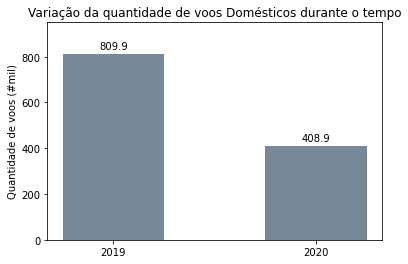

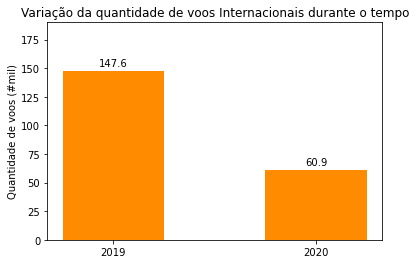

In [13]:
x1 = domest_inter[domest_inter['ds_natureza_etapa'] == 'DOMÉSTICA']['nr_ano_referencia']
y1 = domest_inter[domest_inter['ds_natureza_etapa'] == 'DOMÉSTICA']['qtd_voos'] / 1000
bar1 = plt.bar(x1,y1, tick_label = ['2019', '2020'], width = 0.5, color = 'lightslategrey')
plt.title('Variação da quantidade de voos Domésticos durante o tempo')

ax = plt.gca()
plt.draw()
plt.ylim([0,950])
plt.ylabel('Quantidade de voos (#mil)')
autolabel(bar1)
plt.savefig("bar1.png", dpi = 150)
plt.show()

x2 = domest_inter[domest_inter['ds_natureza_etapa'] == 'INTERNACIONAL']['nr_ano_referencia']
y2 = domest_inter[domest_inter['ds_natureza_etapa'] == 'INTERNACIONAL']['qtd_voos'] / 1000
bar2 = plt.bar(x2,y2 , tick_label = ['2019', '2020'],  width = 0.5, color = 'darkorange')
plt.title('Variação da quantidade de voos Internacionais durante o tempo')
ax = plt.gca()
plt.draw()
plt.ylim([0,190])
plt.ylabel('Quantidade de voos (#mil)')
autolabel(bar2)
plt.savefig("bar2.png", dpi = 150)
plt.show()

### Focusing in Internacional Flights

1 - The most flight route?

2 - How many passengers flight?

3 - How was the most flied aircraft?

#### Most flight origins

In [14]:
inter = final_df[final_df['ds_natureza_etapa'] == 'INTERNACIONAL']

# Origem com mais voos
origem = inter[['nm_pais_origem', 'nm_aerodromo_origem', 'nm_aerodromo_destino', 'nm_pais_destino', 'qtd_voos', 'nr_ano_referencia']].groupby(['nm_pais_origem' ,
                                                                                                                                               #'nm_aerodromo_origem',  
                                                                                                                                               'nr_ano_referencia'], as_index = False).sum()
# Top 5 origens de 2020
print('Top 5 origens de 2019')
print(origem[origem['nr_ano_referencia'] == 2019].sort_values(by = ['qtd_voos'], ascending = False).head(5))

print('Top 5 origens de 2020')
print(origem[origem['nr_ano_referencia'] == 2020].sort_values(by = ['qtd_voos'], ascending = False).head(5))
top_origem_2020 = origem[origem['nr_ano_referencia'] == 2020].sort_values(by = ['qtd_voos'], ascending = False).head(10)['nm_pais_origem']

Top 5 origens de 2019
                nm_pais_origem  nr_ano_referencia  qtd_voos
16                      BRASIL               2019     69767
5                    ARGENTINA               2019     15776
48   ESTADOS UNIDOS DA AMÉRICA               2019     13734
25                       CHILE               2019      7511
109                   PORTUGAL               2019      4918
Top 5 origens de 2020
                nm_pais_origem  nr_ano_referencia  qtd_voos
17                      BRASIL               2020     28049
49   ESTADOS UNIDOS DA AMÉRICA               2020      7242
6                    ARGENTINA               2020      4869
26                       CHILE               2020      2968
110                   PORTUGAL               2020      1912


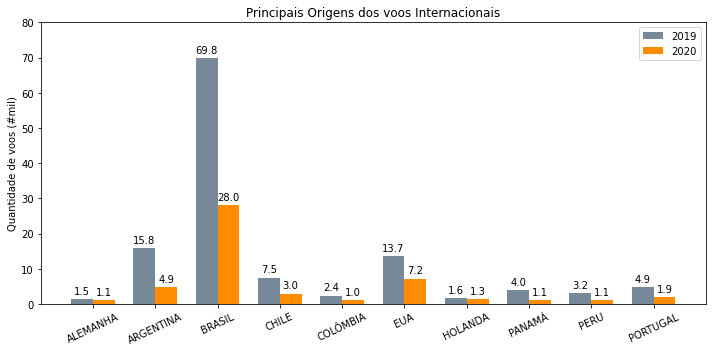

In [16]:
origem_plot = origem[origem['nm_pais_origem'].isin(top_origem_2020.values)]

name_countries = origem_plot[origem['nr_ano_referencia'] == 2020]['nm_pais_origem'].values
name_countries = [country if country != 'ESTADOS UNIDOS DA AMÉRICA' else 'EUA' for country in name_countries] #Tratando nome dos EUA

width = 0.35

r1 = np.arange(len(origem_plot[origem['nr_ano_referencia'] == 2019]['nm_pais_origem']))
r2 = [x + width for x in r1]

fig  = plt.figure(figsize = (10,5))
rects1 = plt.bar(r1, origem_plot[origem['nr_ano_referencia'] == 2019]['qtd_voos']/ 1000 , width, label='2019', color = 'lightslategrey')
rects2 = plt.bar(r2, origem_plot[origem['nr_ano_referencia'] == 2020]['qtd_voos']/ 1000 , width, label='2020', color = 'darkorange')

plt.xticks([r + width / 2 for r in range(len(origem_plot[origem['nr_ano_referencia'] == 2020]['nm_pais_origem']))], name_countries, rotation = 25)
ax = plt.gca()
plt.draw()

plt.ylim([0,80])
plt.ylabel('Quantidade de voos (#mil)')
autolabel(rects1)
autolabel(rects2)
plt.legend()
plt.title('Principais Origens dos voos Internacionais')

fig.tight_layout()
plt.savefig("origem.png", dpi = 200)
plt.show()

#### Most flight destinations

In [17]:
# Destino com mais voos
destino = inter[['nm_aerodromo_destino', 'nm_pais_destino', 'qtd_voos', 'nr_ano_referencia']].groupby(['nm_pais_destino' , 'nr_ano_referencia'], as_index = False).sum()

# Top 5 origens de 2020
print('Top 5 origens de 2019')
print(destino[destino['nr_ano_referencia'] == 2019].sort_values(by = ['qtd_voos'], ascending = False).head(5))

print('Top 5 origens de 2020')
print(destino[destino['nr_ano_referencia'] == 2020].sort_values(by = ['qtd_voos'], ascending = False).head(5))
top_destino_2020 = destino[destino['nr_ano_referencia'] == 2020].sort_values(by = ['qtd_voos'], ascending = False).head(10)['nm_pais_destino']

Top 5 origens de 2019
               nm_pais_destino  nr_ano_referencia  qtd_voos
17                      BRASIL               2019     69585
5                    ARGENTINA               2019     15902
52   ESTADOS UNIDOS DA AMÉRICA               2019     12544
26                       CHILE               2019      7808
110                   PORTUGAL               2019      4932
Top 5 origens de 2020
               nm_pais_destino  nr_ano_referencia  qtd_voos
18                      BRASIL               2020     27842
53   ESTADOS UNIDOS DA AMÉRICA               2020      5715
6                    ARGENTINA               2020      4971
27                       CHILE               2020      3824
111                   PORTUGAL               2020      1908


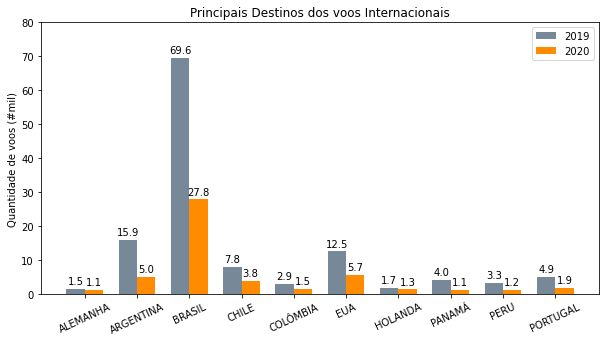

In [18]:
destino_plot = destino[destino['nm_pais_destino'].isin(top_destino_2020.values)]

name_countries = destino_plot[destino['nr_ano_referencia'] == 2020]['nm_pais_destino'].values
name_countries = [country if country != 'ESTADOS UNIDOS DA AMÉRICA' else 'EUA' for country in name_countries] #Tratando nome dos EUA

width = 0.35

r1 = np.arange(len(destino_plot[destino['nr_ano_referencia'] == 2019]['nm_pais_destino']))
r2 = [x + width for x in r1]

plt.figure(figsize = (10,5))
rects1 = plt.bar(r1, destino_plot[destino['nr_ano_referencia'] == 2019]['qtd_voos']/ 1000 , width, label='2019', color = 'lightslategrey')
rects2 = plt.bar(r2, destino_plot[destino['nr_ano_referencia'] == 2020]['qtd_voos']/ 1000 , width, label='2020', color = 'darkorange')

plt.xticks([r + width / 2 for r in range(len(destino_plot[destino['nr_ano_referencia'] == 2020]['nm_pais_destino']))], name_countries, rotation = 25)
ax = plt.gca()
plt.draw()

plt.ylim([0,80])
plt.ylabel('Quantidade de voos (#mil)')
autolabel(rects1)
autolabel(rects2)
plt.legend()
plt.title('Principais Destinos dos voos Internacionais')

fig.tight_layout()
plt.savefig("destino.png", dpi = 200)
plt.show()

### Most flight routes

In [19]:
#Rotas mais realizadas
rota = inter[['nm_pais_origem', 'nm_aerodromo_origem', 'nm_aerodromo_destino',
                 'nm_pais_destino', 'qtd_voos', 'nr_ano_referencia']].groupby(['nm_pais_origem', 'nm_pais_destino',
                                                                               #'nm_aerodromo_destino' , 'nm_aerodromo_origem',
                                                                               'nr_ano_referencia'], as_index = False).sum()

rota['nome_origem'] = [country if country != 'ESTADOS UNIDOS DA AMÉRICA' else 'EUA' for country in rota['nm_pais_origem']] #Tratando nome dos EUA
rota['nome_destino'] = [country if country != 'ESTADOS UNIDOS DA AMÉRICA' else 'EUA' for country in rota['nm_pais_destino']] #Tratando nome dos EUA
rota['Rota'] = rota['nome_origem'] + ' -> ' + rota['nome_destino']

# Top 10 conexões internacionais
top_rota_2020 = rota[rota['nr_ano_referencia'] == 2020].sort_values(by = ['qtd_voos'], ascending = False).head(10)['Rota']
rota[rota['nr_ano_referencia'] == 2020].sort_values(by = ['qtd_voos', 'nr_ano_referencia'], ascending = False).head(10)

,nm_pais_origem,nm_pais_destino,nr_ano_referencia,qtd_voos,nome_origem,nome_destino,Rota
320,ESTADOS UNIDOS DA AMÉRICA,BRASIL,2020,6045,EUA,BRASIL,EUA -> BRASIL
63,BRASIL,ARGENTINA,2020,4514,BRASIL,ARGENTINA,BRASIL -> ARGENTINA
24,ARGENTINA,BRASIL,2020,4365,ARGENTINA,BRASIL,ARGENTINA -> BRASIL
97,BRASIL,ESTADOS UNIDOS DA AMÉRICA,2020,3911,BRASIL,EUA,BRASIL -> EUA
80,BRASIL,CHILE,2020,3417,BRASIL,CHILE,BRASIL -> CHILE
205,CHILE,BRASIL,2020,2220,CHILE,BRASIL,CHILE -> BRASIL
146,BRASIL,PORTUGAL,2020,1902,BRASIL,PORTUGAL,BRASIL -> PORTUGAL
524,PORTUGAL,BRASIL,2020,1901,PORTUGAL,BRASIL,PORTUGAL -> BRASIL
82,BRASIL,COLÔMBIA,2020,1379,BRASIL,COLÔMBIA,BRASIL -> COLÔMBIA
72,BRASIL,BRASIL,2020,1169,BRASIL,BRASIL,BRASIL -> BRASIL


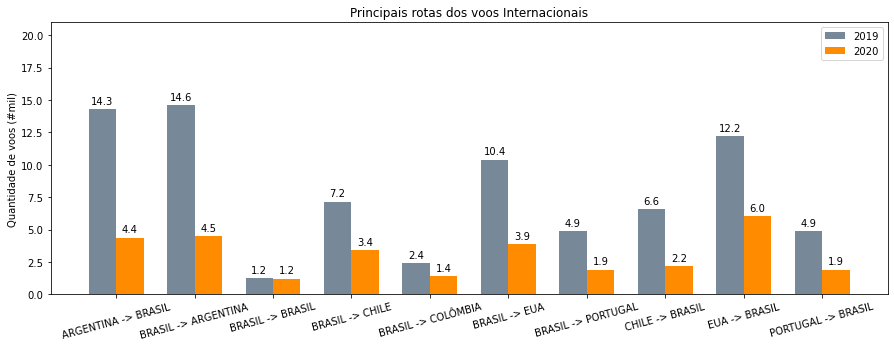

In [20]:
rota_plot = rota[rota['Rota'].isin(top_rota_2020.values)]

name_countries = rota_plot[rota['nr_ano_referencia'] == 2020]['Rota'].values
name_countries = [country if country != 'ESTADOS UNIDOS DA AMÉRICA' else 'EUA' for country in name_countries] #Tratando nome dos EUA

width = 0.35

r1 = np.arange(len(rota_plot[rota['nr_ano_referencia'] == 2019]['Rota']))
r2 = [x + width for x in r1]

plt.figure(figsize = (15,5))
rects1 = plt.bar(r1, rota_plot[rota['nr_ano_referencia'] == 2019]['qtd_voos']/ 1000 , width, label='2019', color = 'lightslategrey')
rects2 = plt.bar(r2, rota_plot[rota['nr_ano_referencia'] == 2020]['qtd_voos']/ 1000 , width, label='2020', color = 'darkorange')

plt.xticks([r + width / 2 for r in range(len(rota_plot[rota['nr_ano_referencia'] == 2020]['Rota']))], name_countries, rotation = 15)
ax = plt.gca()
plt.draw()

plt.ylim([0,21])
plt.ylabel('Quantidade de voos (#mil)')
autolabel(rects1)
autolabel(rects2)
plt.legend()
plt.title('Principais rotas dos voos Internacionais')

fig.tight_layout()
plt.savefig("rota.png")
plt.show()

#### Understanding the Intenacional Route Brasil -> Brasil

In [21]:
rota_br_br = inter[['nm_pais_origem', 'nm_aerodromo_origem', 'nm_aerodromo_destino',
                 'nm_pais_destino', 'qtd_voos', 'nr_ano_referencia', 'ds_tipo_empresa']].groupby(['ds_tipo_empresa','nm_pais_origem', 'nm_pais_destino',
                                                                               'nm_aerodromo_destino' , 'nm_aerodromo_origem',
                                                                               'nr_ano_referencia'], as_index = False).sum()

In [22]:
rota_br_br[rota_br_br['nm_pais_origem'] == "BRASIL"][rota_br_br['nm_pais_destino'] == "BRASIL"].sort_values('qtd_voos', ascending = False)

,ds_tipo_empresa,nm_pais_origem,nm_pais_destino,nm_aerodromo_destino,nm_aerodromo_origem,nr_ano_referencia,qtd_voos
758,ESTRANGEIRA REGULAR,BRASIL,BRASIL,VIRACOPOS,AFONSO PENA,2020,322
757,ESTRANGEIRA REGULAR,BRASIL,BRASIL,VIRACOPOS,AFONSO PENA,2019,263
672,ESTRANGEIRA REGULAR,BRASIL,BRASIL,AFONSO PENA,VIRACOPOS,2019,247
673,ESTRANGEIRA REGULAR,BRASIL,BRASIL,AFONSO PENA,VIRACOPOS,2020,189
756,ESTRANGEIRA REGULAR,BRASIL,BRASIL,VIRACOPOS,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,2020,151
...,...,...,...,...,...,...,...
718,ESTRANGEIRA REGULAR,BRASIL,BRASIL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,PINTO MARTINS,2019,1
717,ESTRANGEIRA REGULAR,BRASIL,BRASIL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,MÁRIO RIBEIRO,2019,1
714,ESTRANGEIRA REGULAR,BRASIL,BRASIL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,HERCÍLIO LUZ,2019,1
112,ESTRANGEIRA NÃO REGULAR,BRASIL,BRASIL,VIRACOPOS,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,2019,1


In [23]:
rota_br_br[rota_br_br['nm_pais_origem'] == "BRASIL"][rota_br_br['nm_pais_destino'] == "BRASIL"].sort_values('qtd_voos', ascending = False).value_counts('ds_tipo_empresa')

ds_tipo_empresa
ESTRANGEIRA REGULAR        123
ESTRANGEIRA NÃO REGULAR     37
dtype: int64

### Number of passengers

In [24]:
#Quantidade de passageiros transportados e carga paga
resumo_passageiros = inter[['nr_passag_pagos', 'nr_passag_gratis', 'km_distancia', 'kg_payload', 'kg_carga_paga', 'kg_correio', 'kg_peso','nr_pax_gratis_km', 'qtd_voos', 'nr_ano_referencia', 'nr_assentos_ofertados']].groupby([ 'nr_ano_referencia'], as_index = False).sum()
resumo_passageiros

,nr_ano_referencia,nr_passag_pagos,nr_passag_gratis,km_distancia,kg_payload,kg_carga_paga,kg_correio,kg_peso,nr_pax_gratis_km,qtd_voos,nr_assentos_ofertados
0,2019,24648962.0,345330.0,716358645.0,5471705812,961917598.0,20036839.0,3.018869e+09,2.234367e+09,147607,29871197
1,2020,6891489.0,122867.0,310282220.0,2828466827,891269793.0,14150269.0,1.539730e+09,8.135087e+08,60896,10282582


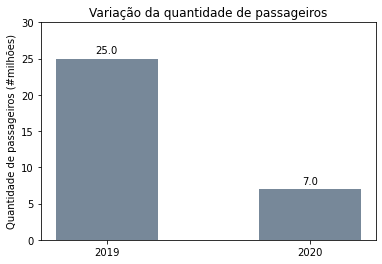

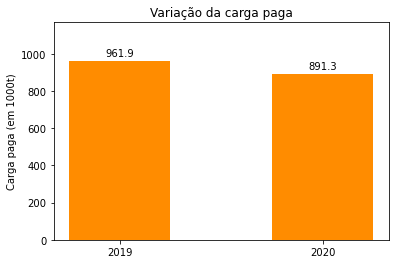

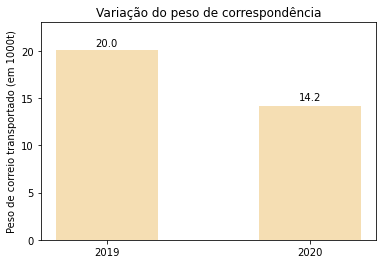

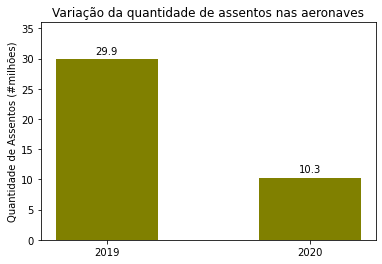

In [25]:
x1 = resumo_passageiros['nr_ano_referencia']
y1 = (resumo_passageiros['nr_passag_pagos'] + resumo_passageiros['nr_passag_gratis']) / 1000000
bar1 = plt.bar(x1,y1, tick_label = ['2019', '2020'], width = 0.5, color = 'lightslategrey')
plt.title('Variação da quantidade de passageiros')

ax = plt.gca()
plt.draw()
plt.ylim([0,30])
plt.ylabel('Quantidade de passageiros (#milhões)')
autolabel(bar1)
plt.savefig("bar3.png", dpi = 150)
plt.show()

x2 =  resumo_passageiros['nr_ano_referencia']
y2 =  resumo_passageiros['kg_carga_paga'] / 1000000
bar2 = plt.bar(x2,y2 , tick_label = ['2019', '2020'],  width = 0.5, color = 'darkorange')
plt.title('Variação da carga paga')
ax = plt.gca()
plt.draw()
plt.ylim([0,1170])
plt.ylabel('Carga paga (em 1000t)')
autolabel(bar2)
plt.savefig("bar4.png", dpi = 150)
plt.show()


x3 =  resumo_passageiros['nr_ano_referencia']
y3 =  resumo_passageiros['kg_correio'] / 1000000
bar3 = plt.bar(x3,y3 , tick_label = ['2019', '2020'],  width = 0.5, color = 'wheat')
plt.title('Variação do peso de correspondência')
ax = plt.gca()
plt.draw()
plt.ylim([0,23])
plt.ylabel('Peso de correio transportado (em 1000t)')
autolabel(bar3)
plt.savefig("bar5.png", dpi = 150)
plt.show()


x4 =  resumo_passageiros['nr_ano_referencia']
y4 =  resumo_passageiros['nr_assentos_ofertados'] / 1000000
bar4 = plt.bar(x4,y4 , tick_label = ['2019', '2020'],  width = 0.5, color = 'olive')
plt.title('Variação da quantidade de assentos nas aeronaves')
ax = plt.gca()
plt.draw()
plt.ylim([0,36])
plt.ylabel('Quantidade de Assentos (#milhões)')
autolabel(bar4)
plt.savefig("bar6.png", dpi = 150)
plt.show()

### Most flight aircraft

In [26]:
aero_inter = inter[['ds_modelo', 'nr_ano_referencia', 'qtd_voos','nr_passag_pagos', 'nr_passag_gratis', 'kg_correio', 'kg_carga_paga']].groupby(['ds_modelo', 'nr_ano_referencia'], as_index = False).sum()

aero_inter.sort_values(by = ['qtd_voos', 'nr_ano_referencia'], ascending = False).head(10)

top_10_aero_2020 = aero_inter[aero_inter['nr_ano_referencia'] == 2020].sort_values(by = ['qtd_voos', 'nr_ano_referencia'], ascending = False).head(10)

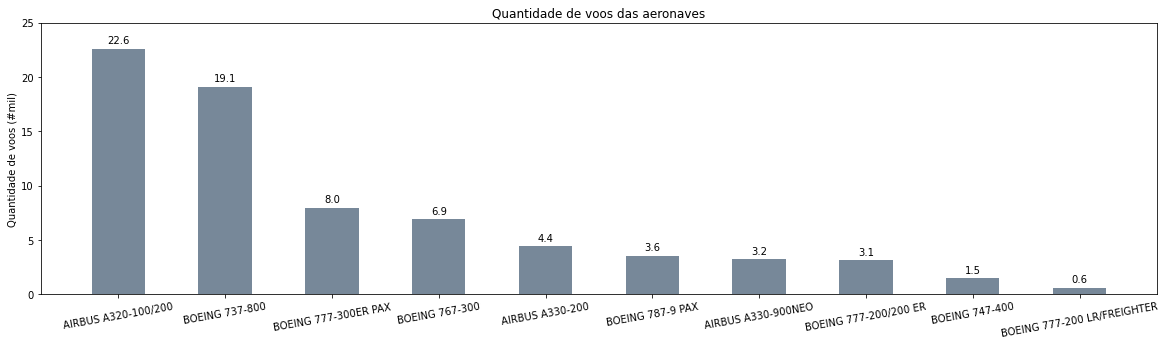

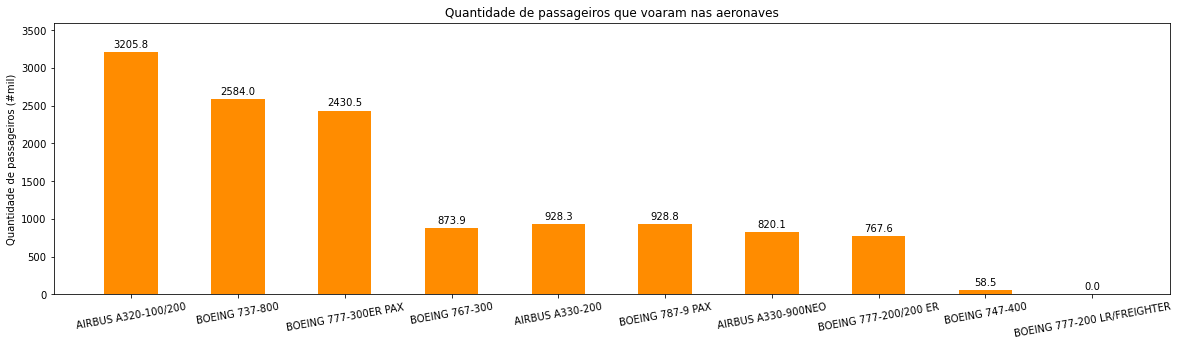

In [27]:
aero_inter_2 = aero_inter[aero_inter['ds_modelo'].isin(top_10_aero_2020['ds_modelo'].values)]

aero_inter_2.sort_values(by = ['qtd_voos'], ascending = False, inplace = True)

plt.figure(figsize=(20,5))
x5 =  aero_inter_2[aero_inter_2['nr_ano_referencia'] == 2019]['ds_modelo']
y5 =  (aero_inter_2[aero_inter_2['nr_ano_referencia'] == 2019]['qtd_voos']) / 1000
bar5 = plt.bar(x5,y5 ,  width = 0.5, color = 'lightslategrey')
plt.title('Quantidade de voos das aeronaves')
ax = plt.gca()
plt.draw()

plt.xticks(x5, rotation = 10)
plt.ylim([0,25])
plt.ylabel('Quantidade de voos (#mil)')
autolabel(bar5)
plt.savefig("bar7.png", dpi = 150)
plt.show()

#plotando gráfico da quantidade de passageiros
plt.figure(figsize=(20,5))
x6 =  aero_inter_2[aero_inter_2['nr_ano_referencia'] == 2019]['ds_modelo']
y6 =  (aero_inter_2[aero_inter_2['nr_ano_referencia'] == 2019]['nr_passag_pagos'] + aero_inter_2[aero_inter_2['nr_ano_referencia'] == 2019]['nr_passag_gratis']) / 1000
bar6 = plt.bar(x6,y6 ,  width = 0.5, color = 'darkorange')
plt.title('Quantidade de passageiros que voaram nas aeronaves')
ax = plt.gca()
plt.draw()

plt.xticks(x5, rotation = 10)
plt.ylim([0,3600])
plt.ylabel('Quantidade de passageiros (#mil)')
autolabel(bar6)
plt.savefig("bar8.png", dpi = 150)
plt.show()


### Understanding the behaviour during the Coronavirus pandemic

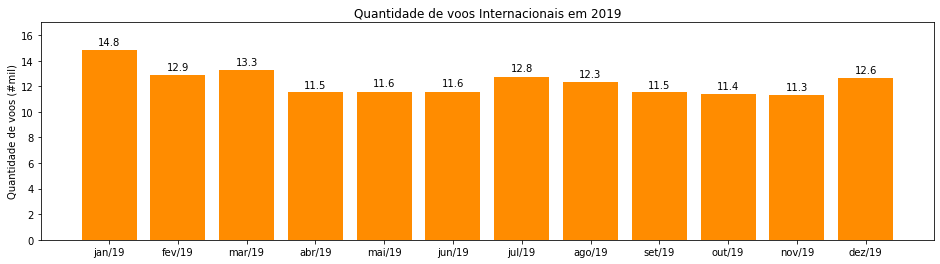

In [28]:
# Variação da frequência de voos
data_month = inter[['nr_ano_mes_referencia','qtd_voos','nr_passag_pagos', 'nr_passag_gratis', 
                    'kg_correio', 'kg_carga_paga','nm_mes_referencia']].groupby(['nr_ano_mes_referencia','nm_mes_referencia'], as_index = False).sum()


plt.figure(figsize=(16,4))
bar10 = plt.bar(data_month[data_month['nr_ano_mes_referencia'] <= 202000]['nr_ano_mes_referencia'], data_month[data_month['nr_ano_mes_referencia'] <= 202000]['qtd_voos']/1000, color = 'darkorange', )

plt.xticks(range(201901,201913),['jan/19', 'fev/19', 'mar/19', 'abr/19', 'mai/19', 'jun/19', 'jul/19', 'ago/19', 'set/19', 'out/19', 'nov/19', 'dez/19'])
#plt.xlabel('Ano mês dos voos')
plt.ylabel('Quantidade de voos (#mil)')

ax = plt.gca()
plt.draw()
autolabel(bar10)
plt.title('Quantidade de voos Internacionais em 2019')
plt.ylim([0,17])
plt.savefig("bar9.png", dpi = 150)
plt.show()

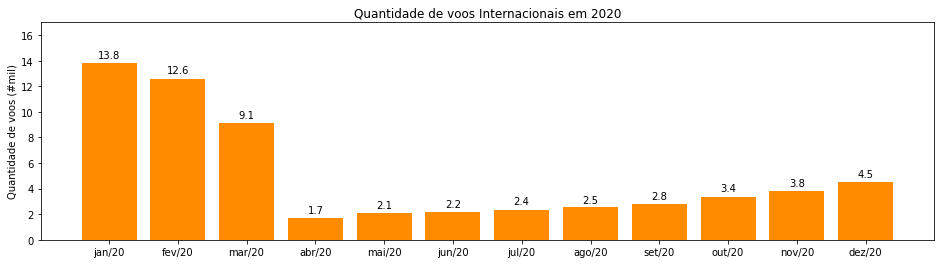

In [29]:
# Variação da frequência de voos
data_month = inter[['nr_ano_mes_referencia','qtd_voos','nr_passag_pagos', 'nr_passag_gratis', 
                    'kg_correio', 'kg_carga_paga','nm_mes_referencia']].groupby(['nr_ano_mes_referencia','nm_mes_referencia'], as_index = False).sum()


plt.figure(figsize=(16,4))
bar10 = plt.bar(data_month[data_month['nr_ano_mes_referencia'] >= 202000]['nr_ano_mes_referencia'], data_month[data_month['nr_ano_mes_referencia'] >= 202000]['qtd_voos']/1000, color = 'darkorange', )

plt.xticks(range(202001,202013),['jan/20', 'fev/20', 'mar/20', 'abr/20', 'mai/20', 'jun/20', 'jul/20', 'ago/20', 'set/20', 'out/20', 'nov/20', 'dez/20'])
#plt.xlabel('Ano mês dos voos')
plt.ylabel('Quantidade de voos (#mil)')

ax = plt.gca()
plt.draw()
autolabel(bar10)
plt.title('Quantidade de voos Internacionais em 2020')
plt.ylim([0,17])
plt.savefig("bar10.png", dpi = 150)
plt.show()